# Importing Library and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [5]:
data.shape

(10841, 13)

In [4]:
data = pd.read_csv("C:\\Users\RUSHABH\Onedrive\Desktop\Rushabh K\Python Chapter\python Assignment\Assignment1\Python Assignment 2_BI\playstore-analysis (2) (1).csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data Cleaning – Missing value treatment

### Drop records where rating is missing since rating is our target/study variable

In [5]:
print(f"Missing Values :\n{data.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
data1=data.dropna(subset=['Rating'])

In [7]:
print(f"Missing Empty Values :\n{data1.isnull().sum()}")

Missing Empty Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


### b. Check the null values for the Android Ver column. 

In [8]:
print(f"Missing Values :\n{data1['Android Ver'].isnull().sum()}")

Missing Values :
3


### i. Are all 3 records having the same problem?

In [9]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [10]:
data.drop([10472], inplace = True)                 # Here is dropping record of "Life Made WIFI"

In [11]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### ii. Replace remaining missing values with the mode

In [12]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)

### c. Current ver – replace with most common value

In [13]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True) # Missing Values Filled

In [14]:
print(f"Missing Values :{data['Current Ver'].isnull().sum()}")

Missing Values :0


# 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

In [15]:
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].astype(int)
data['Last Updated'] = data['Last Updated'].astype('datetime64[ns]')
# REviews and installs need to be numeric type

### b. Price variable – remove $ sign and convert to float


In [16]:
price = []
for i in data['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [17]:
data.drop(labels=data[data['Price']=='Everyone'].index, inplace = True)
data['Price']= price
data['Price']= data['Price'].astype('float')

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [18]:
install = []
for j in data['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

data['Installs']= install
data['Installs']= data['Installs'].astype('int')

### d. Convert all other identified columns to numeric

In [19]:
data['Reviews']= data['Reviews'].astype('int')  # Converted column to numeric

# 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

i. Are there any such records? Drop if so.

In [20]:
pd.unique(data[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

There are no such records found less than 1 and greater 5

### b. Reviews should not be more than installs as only those who installed can review the 
### app.
#### i. Are there any such records? Drop if so

In [21]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4,64000,1,Free,0.00,Everyone,Education,2018-07-17,1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2,238,1,Paid,0.99,Everyone,Personalization,2017-08-18,1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,NaN,11,2000,10,Paid,0.99,Everyone,Tools,2015-03-27,1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
9096,DZ Puzzle,FAMILY,NaN,14,47000,10,Paid,0.99,Everyone,Puzzle,2017-04-22,1.2,2.3 and up


In [22]:
# 7 reviews record found greater than installs

In [23]:
temp = data[data['Reviews']>data['Installs']].index
data.drop(labels=temp, inplace=True)

In [24]:
data.loc[data['Reviews'] > data['Installs']] # Dropping the Records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
data.shape

(10829, 13)

# 4. Identify and handle outliers –

### a. Price column
### i. Make suitable plot to identify outliers in price

C:\Users\RUSHABH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


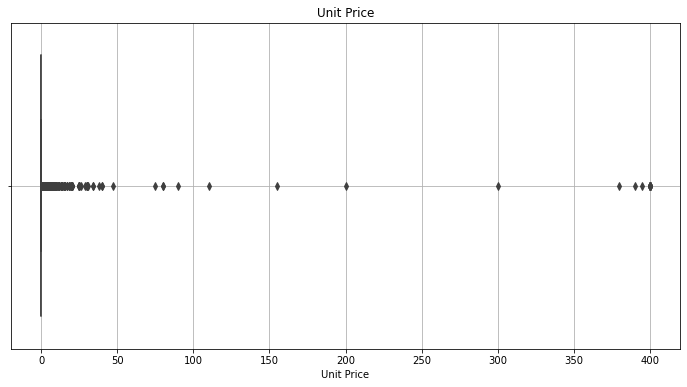

In [26]:
plt.subplots(figsize=(12,6))
sns.boxplot(data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

### ii. Do you expect apps on the play store to cost $ 200? Check out these case

In [27]:
print('Yes we can expect apps on the play store to cost $200')
data.loc[data['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


### iv. Limit data to records with price < $30

In [28]:
gt_30 = data[data['Price'] > 30].index
data.drop(labels=gt_30, inplace=True)

In [29]:
count = data.loc[data['Price'] > 30].index
count.value_counts().sum()

0

### ii. After dropping the useless records, make the suitable plot again to identify outliers

C:\Users\RUSHABH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


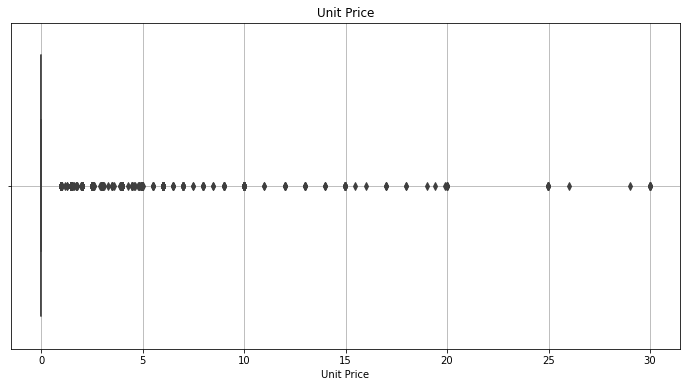

In [30]:
plt.subplots(figsize=(12,6))
sns.boxplot(data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

# b. Reviews column
### i. Make suitable plot

Category
GAME                   1585422327
COMMUNICATION           815462260
SOCIAL                  621241402
FAMILY                  410225030
TOOLS                   273185033
PHOTOGRAPHY             213516650
SHOPPING                115041222
PRODUCTIVITY            114116975
VIDEO_PLAYERS           110380188
PERSONALIZATION          89346138
SPORTS                   70830169
TRAVEL_AND_LOCAL         62617919
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54400863
EDUCATION                39595786
HEALTH_AND_FITNESS       37893743
MAPS_AND_NAVIGATION      30659254
BOOKS_AND_REFERENCE      21959069
FINANCE                  17547951
WEATHER                  14604735
BUSINESS                 13954546
LIFESTYLE                12867409
FOOD_AND_DRINK            8883330
DATING                    7291278
HOUSE_AND_HOME            3976385
COMICS                    3383276
ART_AND_DESIGN            1714440
MEDICAL                   1585343
AUTO_AND_VEHICLES         1163666
LIBRA

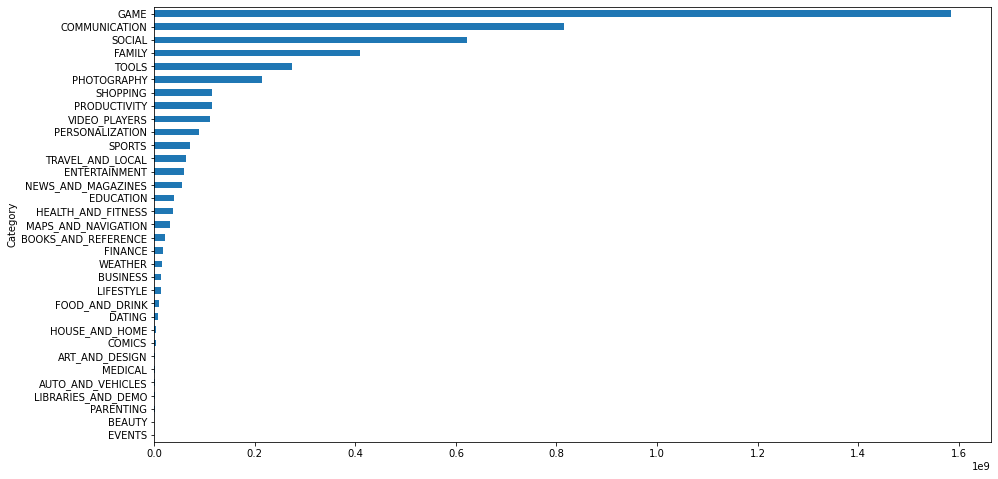

In [31]:
total=data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=10)
print(total.sort_values(ascending=False))
plt.show()


### ii. Limit data to apps with < 1 Million reviews

In [32]:
gt_1m = data[data['Reviews'] > 1000000 ].index
data.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'cols dropped')

704 cols dropped


## c. Installs
### i. What is the 95th percentile of the installs?

In [33]:
percentile = data.Installs.quantile(0.95) #95th Percentile of Installs
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


### i. Drop records having a value more than the 95th percentile

In [34]:
temp1 = data[data["Installs"] > percentile].index
data.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())        # Drrpped REcords having more than 95th ppercentile

199


In [35]:
# Now there is records more than 95th percentile

# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
values?

a. How do you explain this?

C:\Users\RUSHABH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


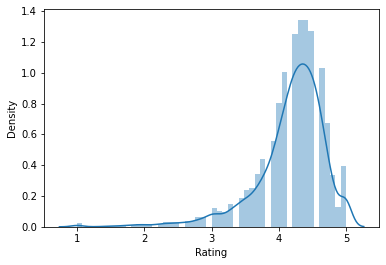

In [47]:
sns.distplot(data['Rating'])
plt.show()

b. What is the implication of this on your analysis

In [50]:
data['Rating'].mode()

0    4.3
dtype: float64

# 6. What are the top Content Rating values

#### a. Are there any values with very few records?

In [51]:
data['Content Rating'].value_counts()

Everyone           8062
Teen               1024
Mature 17+          455
Everyone 10+        349
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
there are  adults only 18+, Unrated 2,  are very few Rating.

#### b. If yes, drop those as they won’t help in the analysis

In [52]:
Adult_rating = data[data['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =data[data['Content Rating'] == 'Unrated'].index.to_list()
data.drop(Adult_rating, inplace = True)
data.drop(unrated, inplace = True)
data['Content Rating'].value_counts()

Everyone        8062
Teen            1024
Mature 17+       455
Everyone 10+     349
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

#### a. Make a joinplot to understand the effect of size on rating

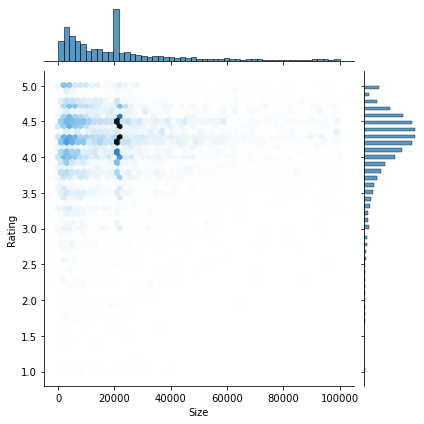

In [54]:
sns.jointplot(y ='Rating', x ='Size', data = data, kind ='hex')
plt.show()

#### b. Do you see any patterns? c. How do you explain the pattern

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000(40 mb).
 Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store

# 8. Effect of price on rating

#### a. Make a join plot with rgression line

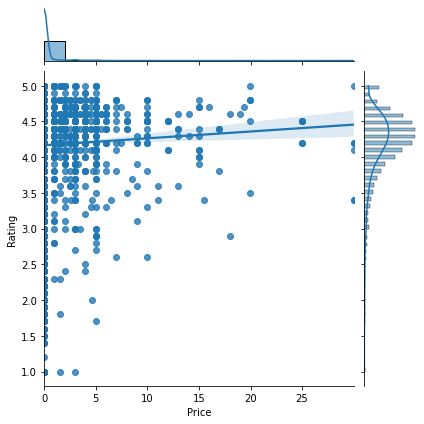

In [64]:
sns.jointplot(x ="Price" , y = "Rating" ,data = data, kind='reg')
plt.show()

#### b. What pattern do you see?

It shows the Rating inreasing and Price also incresing

#### c. How do you explain the pattern

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [67]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.213910,0.744276,-0.067072
Size,0.058076,0.213910,1.000000,0.206752,0.004359
Installs,0.118414,0.744276,0.206752,1.000000,-0.099462
Price,0.031479,-0.067072,0.004359,-0.099462,1.000000


#### d. Replot the data, this time with only records with price > 0 

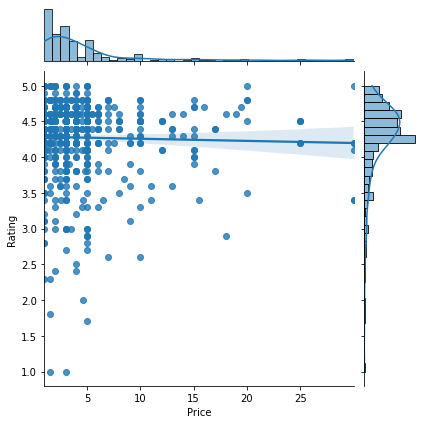

In [68]:
data=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')
plt.show()

#### e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [69]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117942,0.063960,-0.025975
Reviews,0.095986,1.000000,0.162123,0.789193,-0.040737
Size,0.117942,0.162123,1.000000,0.118316,0.050468
Installs,0.063960,0.789193,0.118316,1.000000,-0.048500
Price,-0.025975,-0.040737,0.050468,-0.048500,1.000000


#### f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

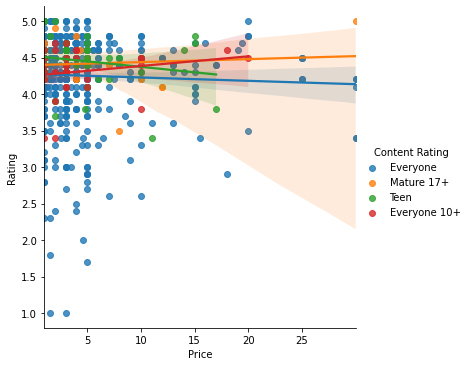

In [70]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=data)
plt.show()

Mature and Teen are more posively co-related in Content rating than 10+ and everyone

# 9. Look at all the numeric interactions together – 

#### a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

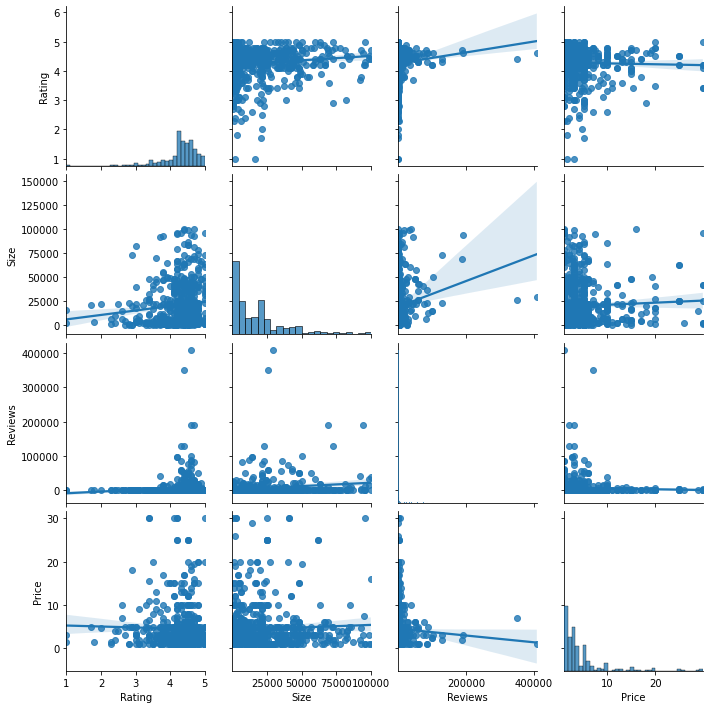

In [71]:
sns.pairplot(data,vars=['Rating','Size', 'Reviews', 'Price'], kind='reg')
plt.show()

# 10. Rating vs. content rating

#### a. Make a bar plot displaying the rating for each content rating
#### b. Which metric would you use? Mean? Median? Some other quantile

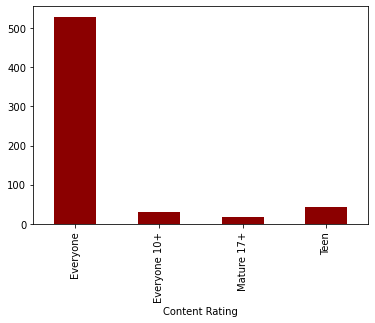

In [82]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkred")
plt.show()

#### c. Choose the right metric and plot

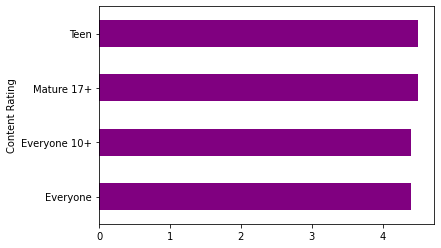

In [89]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="purple")
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

#### a. Create 5 buckets (20% records in each) based on Size

C:\Users\RUSHABH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


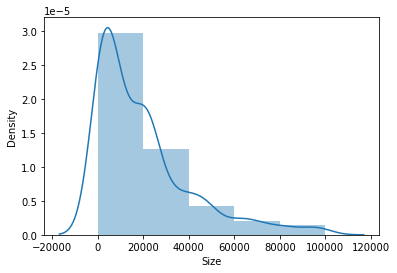

In [90]:
#Checking skewness
sns.distplot(data["Size"], bins=5)
plt.show()

In [93]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.201597,4.323077,3.500000,4.422222
20k-40k,4.312857,4.284615,4.454545,4.688889
40k-60k,4.318750,4.100000,4.425000,4.514286
60k-80k,4.447619,4.500000,NaN,4.200000
80k-100k,4.314286,4.550000,5.000000,4.225000


#### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
#### combination

In [104]:
df=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
df

Content Rating,Everyone 10+,Mature 17+,Teen
Bucket Size,,,
0-20k,4.14,NaN,NaN
20k-40k,4.14,4.2,4.56
40k-60k,3.98,4.1,4.32
60k-80k,4.50,NaN,4.02
80k-100k,4.46,5.0,3.96


#### c. Make a heatmap of this
##### i. Annotated


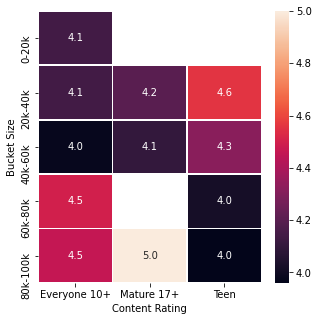

In [106]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df, annot=True, linewidths=.8, fmt='.1f',ax=ax)
plt.show()

#### ii. Greens color map

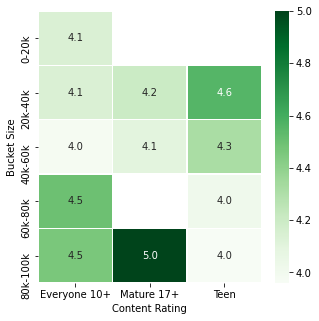

In [107]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

#### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the dhighest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.

From the Analysis most app preferred in all good content Rating, no big variation in all content 
Everyone content is Highest rating content